In [49]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [44]:
df = pd.read_csv("heart.csv")

In [45]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [46]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [47]:
df.loc[df['ca']==4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [48]:
df.loc[df['ca']==4,'ca']=np.NaN

In [12]:
df['ca'].unique()

array([ 0.,  2.,  1.,  3., nan])

In [15]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [16]:
df.loc[df['thal']==0,'thal']=np.NaN

In [17]:
df[df['thal']==0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [18]:
df['thal'].unique()

array([ 1.,  2.,  3., nan])

In [20]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          5
thal        2
target      0
dtype: int64

In [21]:
df = df.fillna(df.median())
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [23]:
duplicates = df.duplicated(keep=False).sum()
duplicates

2

In [24]:
duplicated=df[df.duplicated(keep=False)]

In [25]:
duplicated.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1
164,38,1,2,138,175,0,1,173,0,0.0,2,0.0,2.0,1


In [26]:
#e) Statistics summary
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.663366,2.326733,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,0.934375,0.583020,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [32]:
df['target'] = df.target.replace({1: "Disease", 0: "No_disease"})
df['sex'] = df.sex.replace({1: "Male", 0: "Female"})
df['cp'] = df.cp.replace({0: "typical_angina", 
                          1: "atypical_angina", 
                          2:"non-anginal pain",
                          3: "asymtomatic"})
df['exang'] = df.exang.replace({1: "Yes", 0: "No"})
df['fbs'] = df.fbs.replace({1: "True", 0: "False"})
df['slope'] = df.slope.replace({0: "upsloping", 1: "flat",2:"downsloping"})
df['thal'] = df.thal.replace({1: "fixed_defect", 2: "reversable_defect", 3:"normal"})


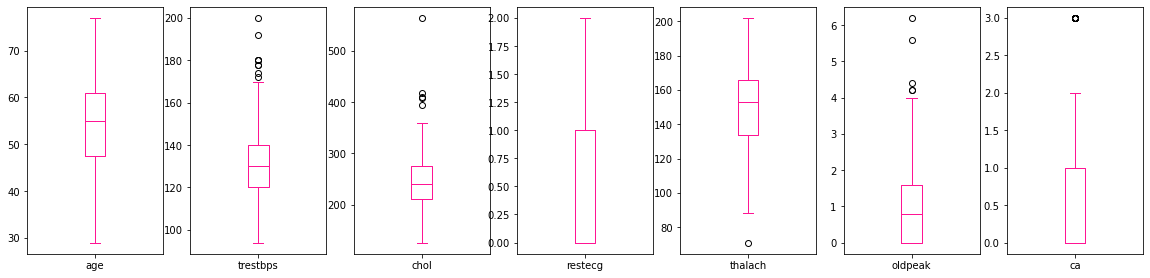

In [34]:
df.plot(kind='box', subplots=True, layout=(2,7),
sharex=False,sharey=False, figsize=(20, 10), 
color='deeppink');

<AxesSubplot:xlabel='target', ylabel='oldpeak'>

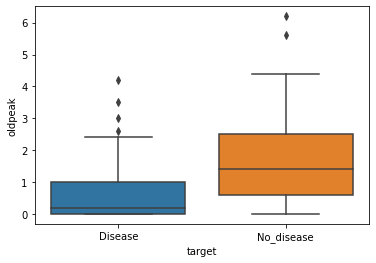

In [39]:
sns.boxplot(x='target', y='oldpeak', data=df)

In [40]:
continous_features = ['age','trestbps','chol','thalach','oldpeak']  
def outliers(df_out, drop = False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.percentile(feature_data, 25.) 
        Q3 = np.percentile(feature_data, 75.) 
        IQR = Q3-Q1 
        outlier_step = IQR * 1.5 
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()  
        if not drop:
            print('For the feature {}, No of Outliers is {}'.format(each_feature, len(outliers)))
        if drop:
            df.drop(outliers, inplace = True, errors = 'ignore')
            print('Outliers from {} feature removed'.format(each_feature))

outliers(df[continous_features])

For the feature age, No of Outliers is 0
For the feature trestbps, No of Outliers is 9
For the feature chol, No of Outliers is 5
For the feature thalach, No of Outliers is 1
For the feature oldpeak, No of Outliers is 5


In [41]:
outliers(df[continous_features],drop=True)

Outliers from age feature removed
Outliers from trestbps feature removed
Outliers from chol feature removed
Outliers from thalach feature removed
Outliers from oldpeak feature removed


Disease       159
No_disease    125
Name: target, dtype: int64


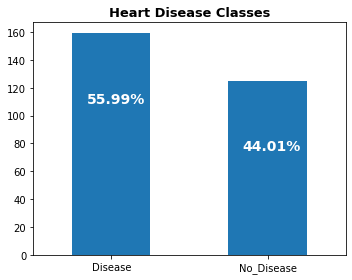

In [42]:
print(df.target.value_counts())

fig, ax = plt.subplots(figsize=(5,4))
name = ["Disease", "No_Disease"]
ax = df.target.value_counts().plot(kind='bar')
ax.set_title("Heart Disease Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-50, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
    
plt.tight_layout()